## Facultad de Ingeniería
## Universidad Nacional Autónoma de México
### Ingeniería Geofísica

### Geofísica Matemática y Computacional
####   Profesor: Luis Miguel de la Cruz Salas



Examen parcial 2

Hernández Terán Oscar

Entrega: Ma 15-Dic-2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Ecuaciòn de logìstica

$\frac{dy(t)}{dt} = \lambda y(1-y)$ 

para: $ 0 < t < T_{max}$

Condiciòn inicial: 


$y(0) = y_0$

Implementación: 

$y_{n+1} = y_n + h_t*\lambda y_n(1-y_n)$

In [2]:
# Funciones necesarias para el funcionamiento del programa
def mesh (a , b , Nt ):
    """
    Esta funciòn genera el valor del tamaño de paso para el dominio dado.
    
    Paràmetros:
    ----------------------
    Entrada:
        Int. a
        Valor inicial en el tiempo.
        Int. b
        Valor final en el tiempo.
        Int. Nt
        Nùmero de pasos de tiempo.
    Salida:
        Float. ht
        Tamaño de paso.
    """
    ht = (b - a) / Nt
    return ht

def forwardEuler (y , yo , ht , lam ):
    """
    Esta función genera la aproximación de la solución a través del algoritmo de Euler hacia adelante.    
    Paràmetros
    -------------------------
    Entrada:
        Float. y
        Vector con la condicion inicial.
        Float. y0
        Condicion inicial.
        Float. ht
        Tamaño de paso de tiempo.
        Float. lam
        Constante Lambda de la ecuación.
    Salida:
        Float. An
        Aproximación a la solución de la ecuación.
    """
    A = 1 + ht * lam
    An = []
    for i , val in enumerate (y[0:-1]):
        y[i+1] = A*y[i] + - ht*lam*(y[i]**2)
        An.append(y[i+1])
    return An

def exactSolution (t , y0 , lam ):
    """
    Esta funciòn genera la soluciòn exacta al problema.
    Paràmetros
    -------------------------
    Entrada:
        Float. t
        Vector de tiempo.
        Float. y
        Cantidad de sustancia inicial.
        Float. lam
        Constante Lambda de la ecuación.
    Salida:
        Float. 
        Retorna la soluciòn exacta.
    """
    return (y0)/(y0 + (1-y0)*np.exp(-lam*t))

In [3]:
# Numero de pasos de tiempo
Nt1 = 4
# Tiempo final
Tmax = 1
# Llamado a la funcion para crear tamaño de paso
ht = mesh(0, Tmax, Nt1)
# Condiciones iniciales
lam = 10
y0 = 0.01
# Vector de tiempo
t1 = np.linspace(0 , Tmax , Nt1 +1)
yf1 = np.zeros(Nt1 +1)
# Ajuste de las condiciones iniciales
yf1[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf1 , y0, ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t1 , y0 , lam )
# Calculo de los errores
norma_error_f1 = np.linalg.norm( yf1 - y_exac_p ,2)

In [4]:
# Numero de pasos de tiempo
Nt2 = 16
# Tiempo final
Tmax = 1
# Llamado a la funcion para crear tamaño de paso
ht = mesh(0, Tmax, Nt2)
# Condiciones iniciales
lam = 10
y0 = 0.01
# Vector de tiempo
t2 = np.linspace(0 , Tmax , Nt2 +1)
yf2 = np.zeros(Nt2 +1)
# Ajuste de las condiciones iniciales
yf2[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf2 , y0, ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t2 , y0 , lam )
# Calculo de los errores
norma_error_f2 = np.linalg.norm( yf2 - y_exac_p ,2)

In [5]:
# Numero de pasos de tiempo
Nt3 = 64
# Tiempo final
Tmax = 1
# Llamado a la funcion para crear tamaño de paso
ht = mesh(0, Tmax, Nt3)
# Condiciones iniciales
lam = 10
y0 = 0.01
# Vector de tiempo
t3 = np.linspace(0 , Tmax , Nt3 +1)
yf3 = np.zeros(Nt3 +1)
# Ajuste de las condiciones iniciales
yf3[0] = y0
# Llamado a funciones para la aproximación
An = forwardEuler(yf3 , y0, ht , lam )
# Calculo de soluciones exactas
tl = np.linspace(0 , Tmax , 100)
y_exacta = exactSolution( tl , y0 , lam )
y_exac_p = exactSolution(t3 , y0 , lam )
# Calculo de los errores
norma_error_f3 = np.linalg.norm( yf3 - y_exac_p ,2)

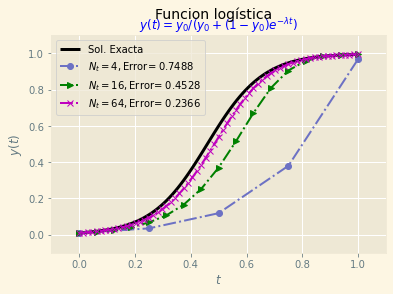

In [17]:
Ecuacion = '$y(t)=y_0/(y_0+(1-y_0)e^{-\lambda t})$'
plt.style.use(['Solarize_Light2'])
fig, (ax1) = plt.subplots(1 ,1)
fig.suptitle('Funcion logística', fontsize =14)
ax1.plot(tl , y_exacta , 'k-', lw=3, label = 'Sol. Exacta')
ax1.plot(t1 , yf1 , 'C7o-.', label = '$N_t={}, $'.format(Nt1) + 'Error= {:.4f}'.format(norma_error_f1))
ax1.plot(t2 , yf2 , 'g>-.', label = '$N_t={}, $'.format(Nt2) + 'Error= {:.4f}'.format(norma_error_f2))
ax1.plot(t3 , yf3 , 'mx-.', label = '$N_t={}, $'.format(Nt3) + 'Error= {:.4f}'.format(norma_error_f3))
ax1.set_title( Ecuacion , fontsize =12 , color = 'blue')
ax1.set_xlim(-0.1,1.1)
ax1.set_ylim(-0.1,1.1)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc = 'upper left', ncol =1 , framealpha =0.75, fancybox =True, fontsize =10)
ax1.grid(color = 'w')
plt.subplots_adjust(hspace=0.35)
plt.savefig('Logistica_Nt_{}.pdf'.format('4,16,64'))
plt.show()